In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install tensorflow

In [4]:
DF = pd.read_excel("bisiklet_fiyatlari.xlsx")
DF.head()

Fiyat  BisikletOzellik1  BisikletOzellik2
0  807.673876       1749.628226       1749.590668
1  959.227520       1748.007826       1751.824206
2  718.020033       1750.122967       1747.977026
3  945.668885       1749.916440       1750.771646
4  955.542968       1750.780519       1750.592430

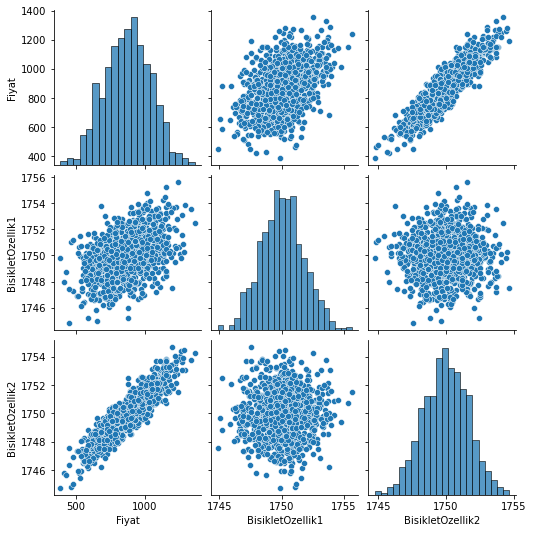

In [5]:
sns.pairplot(DF)

## Veri test-train ikiye ayirma

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split
#random_state, test ve train ayrimi yapilirken iki kisi de ayni rakamlari yazdiginda ayni algoritmaya gore veriler secilir. Ornegin iki kullanici da 42 yazarsa iki kullaniciyi da ayni veriler gelecektir.

In [8]:
#y = wx + b
#y -> label -fiyat
y = DF["Fiyat"].values
#x-> feature(özellik)
x = DF[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(670, 2)

In [10]:
y_train.shape

(670,)

In [11]:
x_test.shape

(330, 2)

In [12]:
y_test.shape

(330,)

In [13]:
#scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train #veriler 0 ve 1 arasina getirilmis oldu yukaridaki kodlarda.

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4,activation="relu")) #buradaki 5, noron sayisidir.
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
#3 tane hidden layer eklemis olduk.

model.add(Dense(1)) #output katmani

model.compile(optimizer = "rmsprop", loss="mse")
#rmsprop haricinde adam'da var.

In [22]:
#su an 1000 veri var, 10000 gibi veri olursa batch olayi devreye girer.

In [23]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 648us/step - loss: 796154.8750
Epoch 2/250
21/21 [==============================] - 0s 598us/step - loss: 795909.5625
Epoch 3/250
21/21 [==============================] - 0s 648us/step - loss: 795709.0625
Epoch 4/250
21/21 [==============================] - 0s 548us/step - loss: 795517.8750
Epoch 5/250
21/21 [==============================] - 0s 598us/step - loss: 795306.7500
Epoch 6/250
21/21 [==============================] - 0s 598us/step - loss: 795069.0625
Epoch 7/250
21/21 [==============================] - 0s 548us/step - loss: 794809.0000
Epoch 8/250
21/21 [==============================] - 0s 548us/step - loss: 794527.6875
Epoch 9/250
21/21 [==============================] - 0s 598us/step - loss: 794224.5000
Epoch 10/250
21/21 [==============================] - 0s 498us/step - loss: 793905.0625
Epoch 11/250
21/21 [==============================] - 0s 548us/step - loss: 793566.9375
Epoch 12/250
21/21 [=====================

In [24]:
loss = model.history.history["loss"]

<AxesSubplot:>

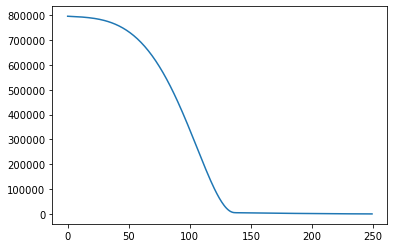

In [25]:
sns.lineplot(x=range(len(loss)),y=loss)

In [26]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [27]:
testLoss = model.evaluate(x_test, y_test, verbose=0) #evaluate degerlendirme

In [28]:
trainLoss

301.7481689453125

In [29]:
testLoss

291.1084289550781

In [30]:
testTahminler = model.predict(x_test)

In [31]:
testTahminler.shape

(330, 1)

In [32]:
tahminDF = pd.DataFrame(y_test, columns=["Gercek y"])

In [33]:
tahminDF

Gercek y
0    1081.652164
1     622.675990
2     889.356810
3     902.826733
4     897.662404
..           ...
325  1028.438035
326   789.934950
327   758.490486
328  1172.871659
329   820.947936

[330 rows x 1 columns]

In [34]:
testTahminler = pd.Series(testTahminler.reshape(330,))

In [35]:
testTahminler

0      1061.429077
1       648.634949
2       877.964355
3       895.007935
4       899.885681
          ...     
325    1002.921326
326     800.874146
327     777.758728
328    1142.913452
329     811.903931
Length: 330, dtype: float32

In [36]:
tahminDF = pd.concat([tahminDF,testTahminler],axis=1)

In [37]:
tahminDF

Gercek y            0
0    1081.652164  1061.429077
1     622.675990   648.634949
2     889.356810   877.964355
3     902.826733   895.007935
4     897.662404   899.885681
..           ...          ...
325  1028.438035  1002.921326
326   789.934950   800.874146
327   758.490486   777.758728
328  1172.871659  1142.913452
329   820.947936   811.903931

[330 rows x 2 columns]

In [38]:
tahminDF.columns= ["Gercek y","Tahmin y"]

In [39]:
tahminDF

Gercek y     Tahmin y
0    1081.652164  1061.429077
1     622.675990   648.634949
2     889.356810   877.964355
3     902.826733   895.007935
4     897.662404   899.885681
..           ...          ...
325  1028.438035  1002.921326
326   789.934950   800.874146
327   758.490486   777.758728
328  1172.871659  1142.913452
329   820.947936   811.903931

[330 rows x 2 columns]

<AxesSubplot:xlabel='Gercek y', ylabel='Tahmin y'>

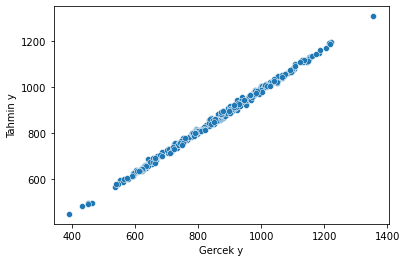

In [40]:
sns.scatterplot(x = "Gercek y", y="Tahmin y", data=tahminDF)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
mean_absolute_error(tahminDF["Gercek y"], tahminDF["Tahmin y"])

13.777042035462832

In [43]:
mean_squared_error(tahminDF["Gercek y"], tahminDF["Tahmin y"])

291.10846006613593

In [44]:
DF.describe()

Fiyat  BisikletOzellik1  BisikletOzellik2
count  1000.000000       1000.000000       1000.000000
mean    872.677801       1750.024800       1749.964733
std     164.124504          1.704531          1.659578
min     390.856887       1744.852108       1744.742389
25%     757.795031       1748.831119       1748.803186
50%     879.168705       1750.017350       1750.003926
75%     988.612778       1751.115765       1751.129414
max    1355.213745       1755.613884       1754.666038

In [45]:
yeniBisikletOz = [[1750,1749]]

In [46]:
yeniBisikletOz=scaler.transform(yeniBisikletOz)

In [47]:
model.predict(yeniBisikletOz)

array([[795.902]], dtype=float32)

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save("bisiklet_modeli.h5") #uzantisi h5'dir.

In [50]:
sonradanCagirilanModel = load_model("bisiklet_modeli.h5")

In [51]:
sonradanCagirilanModel.predict(yeniBisikletOz)

array([[795.902]], dtype=float32)

In [52]:
df = pd.read_excel("merc.xlsx")

In [53]:
df.head()

year  price transmission  mileage  tax   mpg  engineSize
0  2005   5200    Automatic    63000  325  32.1         1.8
1  2017  34948    Automatic    27000   20  61.4         2.1
2  2016  49948    Automatic     6200  555  28.0         5.5
3  2016  61948    Automatic    16000  325  30.4         4.0
4  2016  73948    Automatic     4000  325  30.1         4.0

In [54]:
df.describe()

year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

In [56]:
df.isnull().sum() #hangi kolonda kac eksik var onu gosterir.

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\burak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

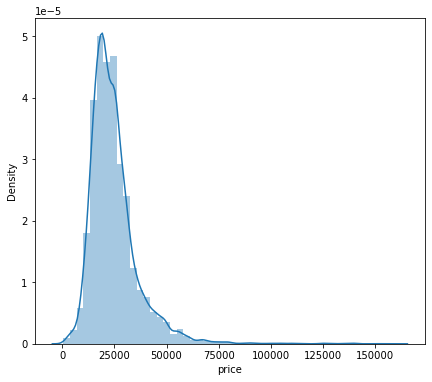

In [66]:
plt.figure(figsize=(7,6))
sns.distplot(df["price"])

<AxesSubplot:xlabel='year', ylabel='count'>

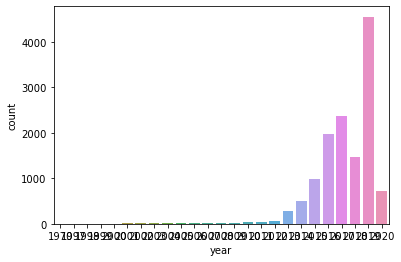

In [69]:
sns.countplot(df["year"])

In [70]:
df.corr()

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.520712 -0.738027  0.012480 -0.094626   -0.142147
price       0.520712  1.000000 -0.537214  0.268717 -0.438445    0.516126
mileage    -0.738027 -0.537214  1.000000 -0.160223  0.202850    0.063652
tax         0.012480  0.268717 -0.160223  1.000000 -0.513742    0.338341
mpg        -0.094626 -0.438445  0.202850 -0.513742  1.000000   -0.339862
engineSize -0.142147  0.516126  0.063652  0.338341 -0.339862    1.000000

In [72]:
df.corr()["price"].sort_values() #sort values degerleri diz anlamina gelir.

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

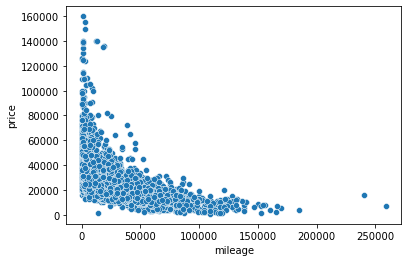

In [74]:
sns.scatterplot(x="mileage",y="price", data=df)

In [76]:
df.sort_values("price", ascending=False).head(20) #asc, ascending false en yuksek fiyati en yukarda getirir.

year   price transmission  mileage  tax   mpg  engineSize
6199   2020  159999    Semi-Auto     1350  145  21.4         4.0
10044  2020  154998    Automatic     3000  150  21.4         4.0
5      2011  149948    Automatic     3000  570  21.4         6.2
8737   2019  140319    Semi-Auto      785  150  22.1         4.0
6386   2018  139995    Semi-Auto    13046  145  21.4         4.0
8      2019  139948    Automatic    12000  145  21.4         4.0
9133   2019  139559    Semi-Auto     1000  145  22.1         4.0
8821   2020  138439    Semi-Auto     1000  145  22.1         4.0
5902   2018  135771    Semi-Auto    19000  145  21.4         4.0
7864   2018  135124    Semi-Auto    18234  150  21.4         4.0
8673   2019  134219    Semi-Auto     1000  145  24.8         4.0
6210   2019  129990    Automatic     1000  145  24.8         4.0
4759   2019  126000    Automatic      250  145  24.6         4.0
2647   2019  125796    Automatic      637  145  24.8         4.0
6223   2019  124999    Automatic     1500  145  31.7         4.0
4094   2019  124366    Semi-Auto      880  145  24.8         4.0
2629   2019  123846    Semi-Auto     2951  145  22.1         4.0
7134   2019  115359    Semi-Auto     1000  145  30.1         4.0
9159   2019  114199    Semi-Auto      891  145  22.6         4.0
1980   2019  109995    Semi-Auto     4688  150  31.7         4.0

In [77]:
df.sort_values("price", ascending=True).head(20) #asc, ascending true da ise en ucuzu ilk basta getirir. Ascending, yukselen anlamina gelir.

year  price transmission  mileage  tax   mpg  engineSize
11816  2003    650       Manual   109090  235  40.0         1.4
12008  2010   1350       Manual   116126  145  54.3         2.0
11765  2000   1490    Automatic    87000  265  27.2         3.2
11549  2002   1495    Automatic    13800  305  39.8         2.7
12594  2004   1495       Manual   119000  300  34.5         1.8
11174  2001   1695    Automatic   108800  325  31.7         3.2
12710  2006   1695    Automatic   153000  300  33.6         1.8
12766  2004   1780    Automatic   118000  265  41.5         2.2
12009  2007   1800    Automatic    84000  200  42.8         1.5
11764  1998   1990    Automatic    99300  265  32.1         2.3
11808  1998   1990    Automatic   113557  265  32.1         2.3
11383  2005   1995    Automatic   105000  260  43.5         2.1
11378  2004   1995    Semi-Auto   165000  330  20.0         3.7
11857  2002   2140    Automatic    52700  325  31.4         2.0
11906  2007   2478    Automatic    81000  160  49.6         2.0
11795  2005   2490    Automatic   101980  200  47.9         2.0
12765  2004   2495    Automatic   104000  325  31.7         1.8
11943  2005   2690    Automatic   109000  325  32.1         1.8
11263  2007   2795       Manual    79485  200  45.6         1.5
49     2006   2880    Automatic    66000  160  52.3         2.0

In [78]:
len(df)

13119

In [79]:
len(df) * 0.01

131.19